# Online Shoppers Intention

# Overview

Due to its ease, online shopping has grown in popularity over the past several years. As a result, companies are spending more money on internet marketing techniques to draw in and keep customers. Nonetheless, it can be difficult for businesses to comprehend their clients' purchase intentions and behavior.

Machine learning classification algorithms can be an effective tool for businesses to predict their customers' purchasing intentions. These algorithms analyze data points such as browsing history, search queries, and past purchases to identify patterns and predict future behavior.

Businesses can gain insights into customer's behavior and make more informed decisions about their marketing and sales strategies using a machine learning classification system. For example, a company may use this technology to identify which customers will most likely purchase and target their marketing efforts accordingly. Conversely, they may also use this technology to identify customers who are unlikely to buy and develop strategies to encourage them to complete a transaction.
Using machine learning classification algorithms to predict purchasing intention can provide valuable insights for businesses looking to improve their online marketing and sales efforts.


# Objective

The objective of this project is to utilize machine learning algorithms to predict the purchasing intention (make a purchase or not) of a visitor to a store's website.


# Variables in the Dataset:

1.	Administrative: This is the number of pages of this type (administrative) that the user visited.
2.	Administrative_Duration: This is the amount of time spent in this category of pages.
3.	Informational: This is the number of pages of this type (informational) that the user visited.
4.	Informational_Duration: This is the amount of time spent in this category of pages.
5.	ProductRelated: This is the number of pages of this type (product related) that the user visited.
6.	ProductRelated_Duration: This is the amount of time spent in this category of pages.
7.	BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional   tasks.
8.	ExitRates: The percentage of pageviews on the website that end at that specific page.
9.	PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
10.	SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or     Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.
11.	Month: Contains the month the pageview occurred, in string form.
12.	OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.
13.	Browser: An integer value representing the browser that the user was using to view the page.
14.	Region: An integer value representing which region the user is located in.
15.	TrafficType: An integer value representing what type of traffic the user is categorized into.
16.	VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
17.	Weekend: A boolean representing whether the session is on a weekend.
18.	Revenue: A boolean representing whether or not the user completed the purchase.


# Target variable

Revenue: A boolean representing whether or not the user completed the purchase.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# import our dataset

data = pd.read_csv(r'C:\Users\ASUS\Downloads\online_shoppers_intention.csv')

In [3]:
# lets See what our first 5 dataframe look like

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# Descriptive analysis

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
# number of rows and columns

data.shape

(12330, 18)

#### There are 12330 records and 18 Features

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### There are  2 Categorical and 14 Numerical Variables (7 Integers and 7 Float), and 2 Boolean in the dataset

In [7]:
# check for missing values

data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### There are no missing values in the dataset

# Exploratory Data Analysis

# Univariate Analysis

In [8]:
# count of Administrative features

data.Administrative.value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64

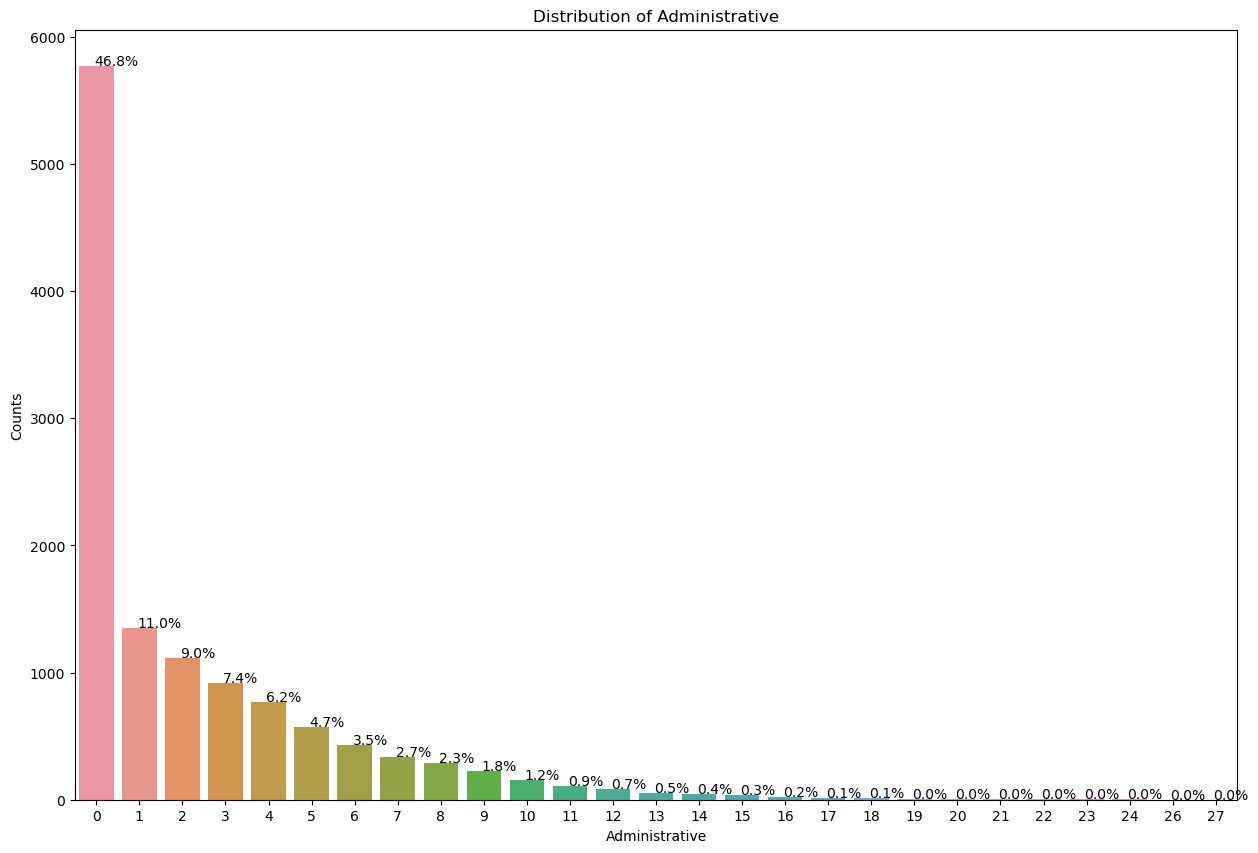

In [9]:
# Distribution of Administrative with features

# create the countplot
plt.figure(figsize=(15,10))
plt.title('Distribution of Administrative')
ax=sns.countplot(data=data, x='Administrative')
plt.xlabel('Administrative')
plt.ylabel('Counts')

# add percentages to the bars
total = float(len(data['Administrative']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))
    
plt.show()

#### Observation: 46.8% of users do not visit the Administrative pages.

In [10]:
# count of Administrative Duration features

data.Administrative_Duration.value_counts()

0.000000      5903
4.000000        56
5.000000        53
7.000000        45
11.000000       42
              ... 
68.014286        1
362.300000       1
90.700000        1
760.900000       1
150.357143       1
Name: Administrative_Duration, Length: 3335, dtype: int64

C:\Users\ASUS\anaconda3\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


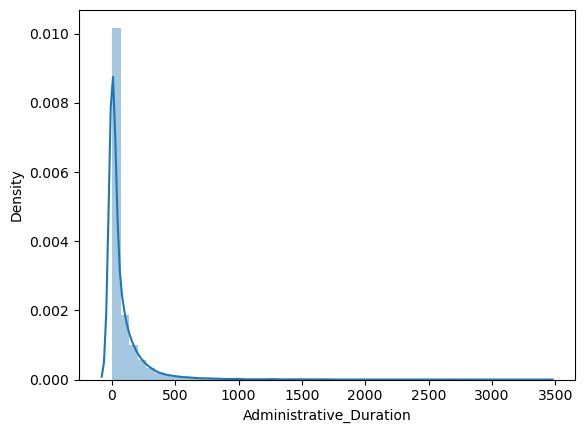

In [11]:
# Distribution of Administrative Duration with features

sns.distplot(data['Administrative_Duration'])
plt.show()

#### Observation: 96.7% of the users do not spend much time on the Administrative pages.

In [12]:
# count of Informational features

data.Informational.value_counts()

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64

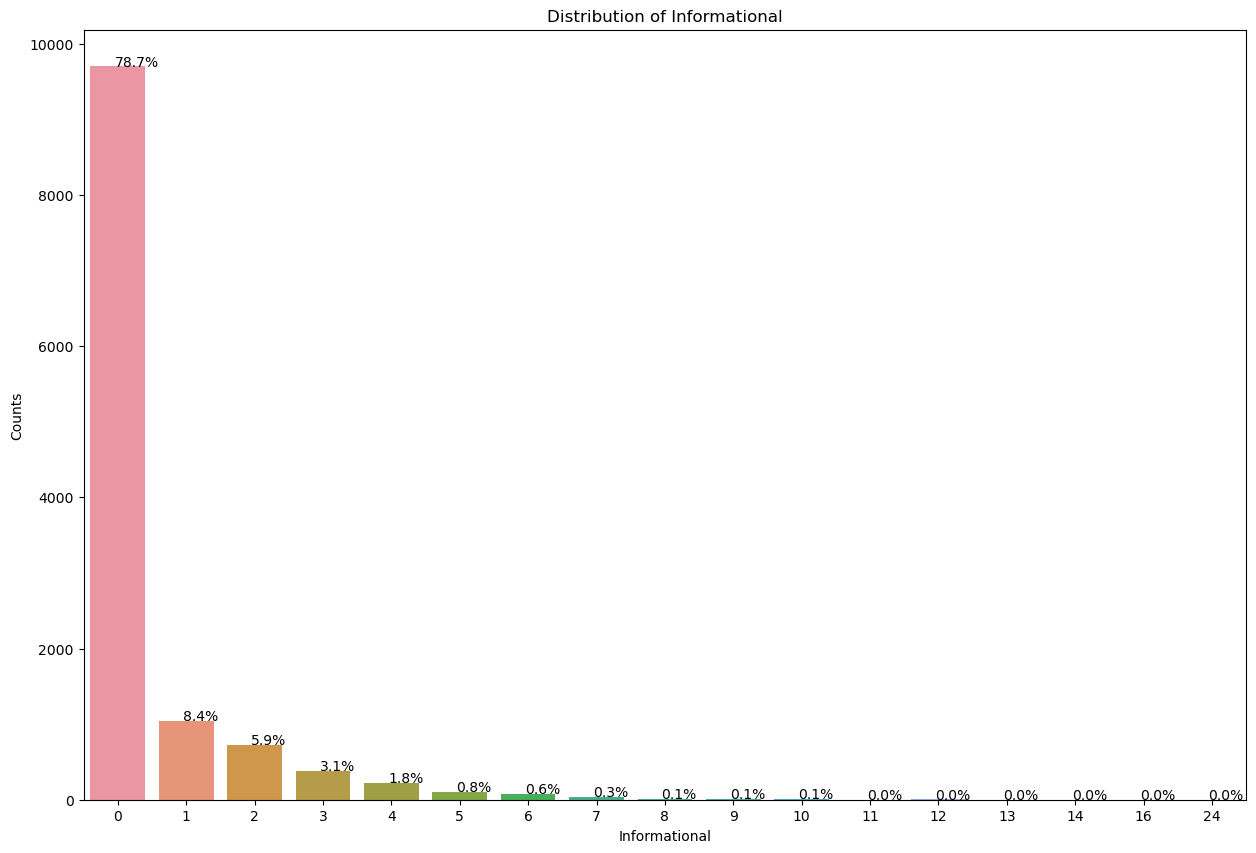

In [13]:
# Distribution of Informational with features

plt.figure(figsize=(15,10))
plt.title('Distribution of Informational')
ax=sns.countplot(data=data, x='Informational')
plt.xlabel('Informational')
plt.ylabel('Counts')

# add percentages to the bars
total = float(len(data['Informational']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))
    
plt.show()

#### Observation: We can see that some users check or visit the information pages, but  78.7% of the users do not visit more information pages.

In [14]:
# count of Informational Duration features

data.Informational_Duration.value_counts()

0.00      9925
9.00        33
7.00        26
10.00       26
6.00        26
          ... 
246.80       1
274.00       1
13.40        1
223.15       1
211.25       1
Name: Informational_Duration, Length: 1258, dtype: int64

Text(0.5, 1.0, 'Distribution of Informational Duration')

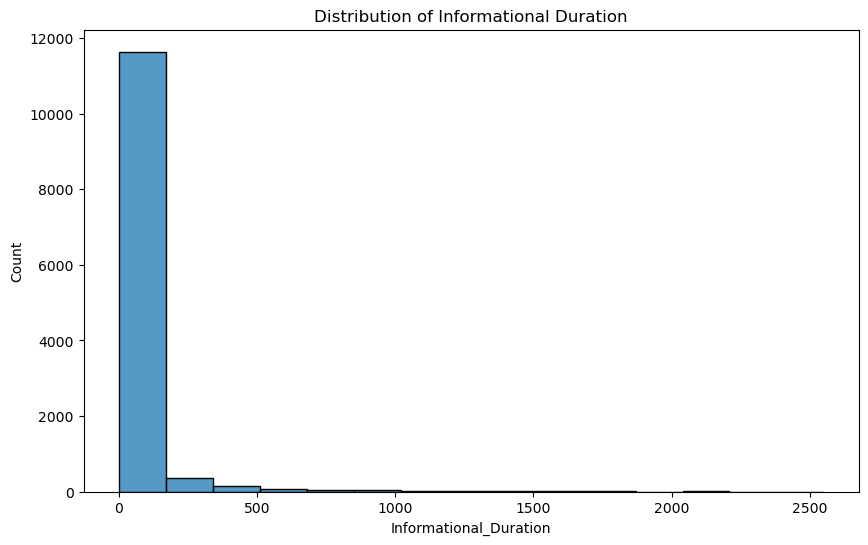

In [15]:
# distribution of Informational Duration 

plt.figure(figsize=(10,6))
ax=sns.histplot(data['Informational_Duration']);
plt.title('Distribution of Informational Duration')

#### Observation: 98.8% of the users do not spend much time on the information pages on the website .

In [16]:
# count of Product Related features

data.ProductRelated.value_counts()

1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

Text(0.5, 1.0, 'Distribution of Product Related')

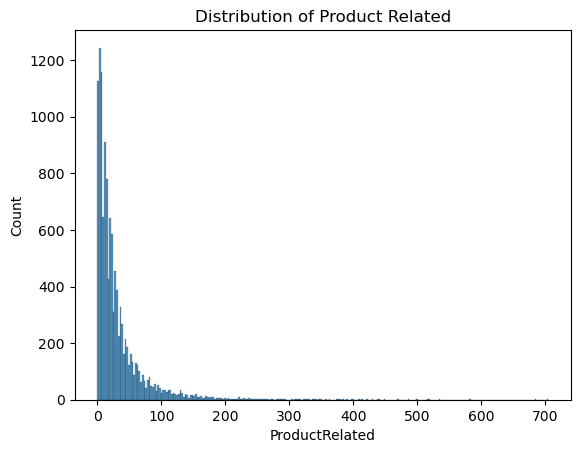

In [17]:
# distribution of Product Related

sns.histplot(data['ProductRelated']);
plt.title('Distribution of Product Related')

#### Observation: Most visitors have visited the website, but more visitors of about 26.5% have not visited product-related pages.

In [18]:
# count of Product Related Duration features

data.ProductRelated_Duration.value_counts()

0.000000      755
17.000000      21
11.000000      17
8.000000       17
15.000000      16
             ... 
964.070513      1
593.507143      1
831.388889      1
922.208333      1
346.000000      1
Name: ProductRelated_Duration, Length: 9551, dtype: int64

Text(0.5, 1.0, 'Distribution of Product Related Duration')

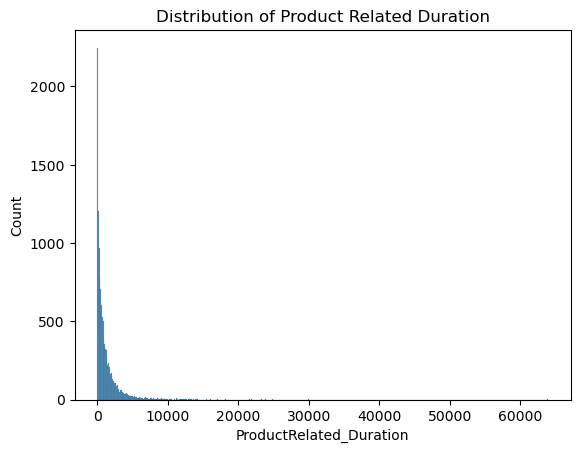

In [19]:
# distribution of Product Related Duration

sns.histplot(data['ProductRelated_Duration']);
plt.title('Distribution of Product Related Duration')

#### Observation: 90.8% visitors don't spend time on product-related pages.

In [20]:
# count of Bounce Rates features

data.BounceRates.value_counts()

0.000000    5518
0.200000     700
0.066667     134
0.028571     115
0.050000     113
            ... 
0.079279       1
0.006723       1
0.013527       1
0.074419       1
0.011149       1
Name: BounceRates, Length: 1872, dtype: int64

Text(0.5, 1.0, 'Distribution of Bounce Rates')

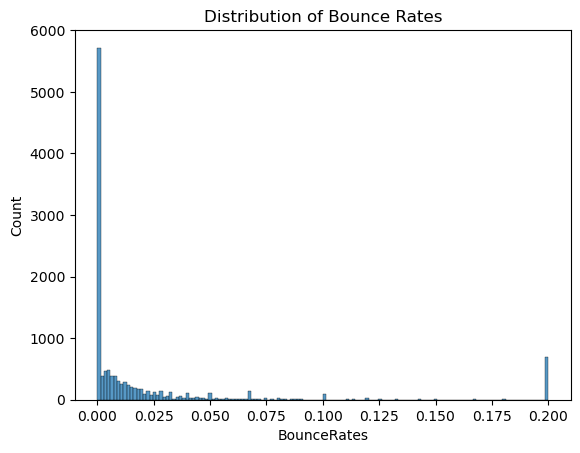

In [21]:
# distribution of Bounce Rates

sns.histplot(data['BounceRates']);
plt.title('Distribution of Bounce Rates')

#### Observation:  83.8% visitors leave the website after viewing only one page, without interacting with other pages or performing additional website tasks. A high bounce rate can indicate that the website's content or user experience is not engaging or relevant enough to keep visitors on the website.

In [22]:
# count of Exit Rates features

data.ExitRates.value_counts()

0.200000    710
0.100000    338
0.050000    329
0.033333    291
0.066667    267
           ... 
0.021816      1
0.015787      1
0.010302      1
0.014534      1
0.029031      1
Name: ExitRates, Length: 4777, dtype: int64

Text(0.5, 1.0, 'Distribution of Exit Rates')

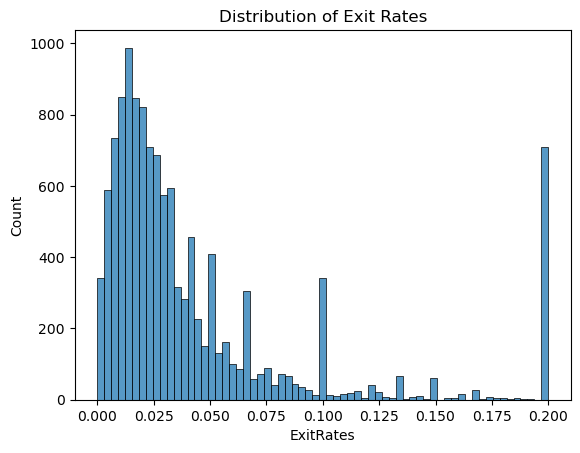

In [23]:
# distribution of Exit Rates 

sns.histplot(data['ExitRates']);
plt.title('Distribution of Exit Rates')

#### Observation: Most people leave the website after viewing a particular page. A high exit rate indicates that visitors are not finding what they want.

In [24]:
# count of Page Values features

data.PageValues.value_counts()

0.000000     9600
53.988000       6
42.293068       3
59.988000       2
16.158558       2
             ... 
6.673696        1
6.094324        1
28.253955       1
16.090650       1
12.241717       1
Name: PageValues, Length: 2704, dtype: int64

Text(0.5, 1.0, 'Distribution of Page Values')

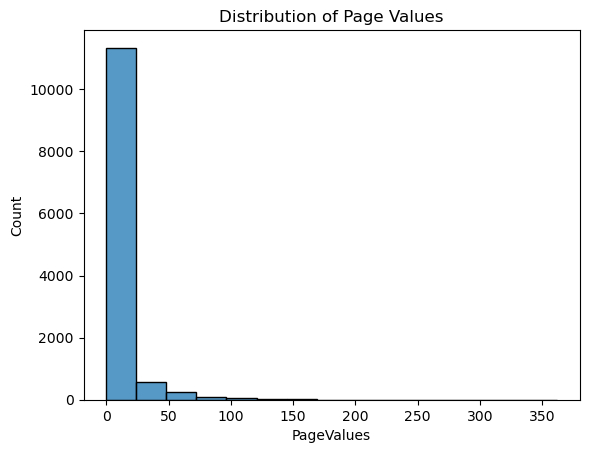

In [25]:
# distribution of Page Values 

sns.histplot(data['PageValues']);
plt.title('Distribution of Page Values')

#### Observation: The majority of the visitors do not complete their e-commerce transaction. This could indicate issues with the design or content of those pages, or it could suggest that they are not being marketed effectively to potential customers.

In [26]:
# count of # count of Special Day features

data.SpecialDay.value_counts()

0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64

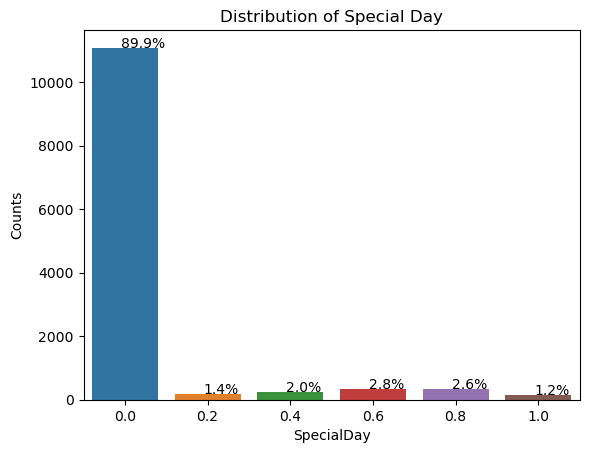

In [27]:
# distribution of Special Day

# create the countplot
plt.title('Distribution of Special Day')
ax=sns.countplot(data=data, x='SpecialDay')
plt.xlabel('SpecialDay')
plt.ylabel('Counts')

# add percentages to the bar 
total = float(len(data['SpecialDay']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

#### Observation: We can see that people visit the website on special days, but a more significant number of people of about 89.9% visited the website on special day 0.0. People browse online stores more than usual on special days like holidays or events, looking for deals and inspiration. They might not necessarily be ready to purchase but are interested in seeing what is available.

In [28]:
# count of Month features

data.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

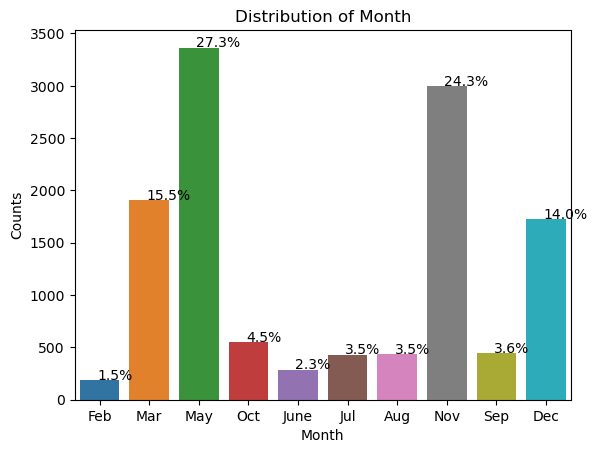

In [29]:
# distribution of Month

# create the countplot
plt.title('Distribution of Month')
ax=sns.countplot(data=data, x='Month')
plt.xlabel('Month')
plt.ylabel('Counts')

# add percentages to the bar 
total = float(len(data['Month']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

#### Observation: May has the highest number of visited users with 27.3%, followed by November (24.3%) and March (15.5%). The fact that May has the highest number of visited users (27.3%) suggests that this month may be a hectic time for the website. This could be due to various reasons, such as seasonal sales or promotional events.

In [30]:
# count of Region features

data.Region.value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

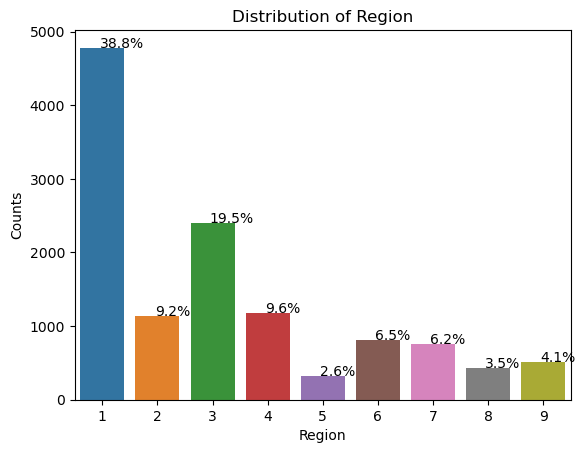

In [31]:
# distribution of Region

# create the countplot
plt.title('Distribution of Region')
ax=sns.countplot(data=data, x='Region')
plt.xlabel('Region')
plt.ylabel('Counts')

# add percentages to the bar 
total = float(len(data['Region']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

#### Observation:   More users of about 38.8% are located at Region 1, followed by Region 3 with 19.5% users

In [32]:
# count of TrafficType features

data.TrafficType.value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

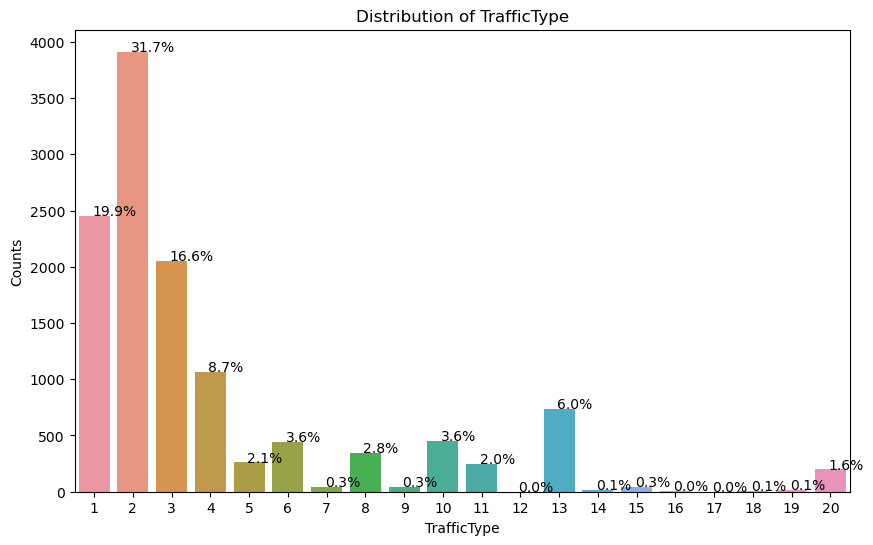

In [33]:
# distribution of Traffic Type featureS

# create the countplot
plt.figure(figsize=(10,6))
plt.title('Distribution of TrafficType')
ax=sns.countplot(data=data, x='TrafficType')
plt.xlabel('TrafficType')
plt.ylabel('Counts')

# add percentages to the bar 
total = float(len(data['TrafficType']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

#### Observation: The top 3 traffic type used by visitors/customers are traffic type 2 with 31.7%, 1 with 19.9% and 3 with 16.6%. It could be organic traffic, which comes from search engines, or paid traffic, which comes from online advertising campaigns such as Google AdWords. It could also include referral traffic from other websites that link to the business website or direct traffic, which occurs when visitors type in the website URL directly into their browser. By analyzing TrafficType, businesses can better understand where their website visitors are coming from and which marketing channels are most effective in driving traffic.

In [34]:
# count of Visitor Type features

data.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

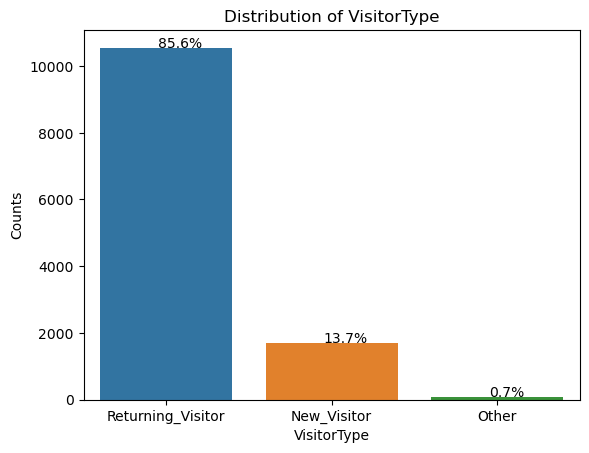

In [35]:
# Distribution of Visitor Type with features

# create the countplot
plt.title('Distribution of VisitorType')
ax=sns.countplot(data=data, x='VisitorType')
plt.xlabel('VisitorType')
plt.ylabel('Counts')

# add percentages to the bars
total = float(len(data['VisitorType']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

#### Observation: A significant number of  85.6% visitors are returning visitors or customers which could indicate that the business has provided a positive experience and value to the customers.

In [36]:
# count of Weekend features

data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

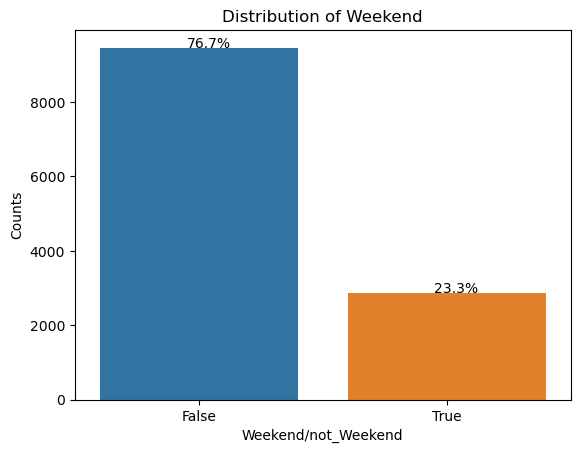

In [37]:
# Distribution of Weekend with features

# create the countplot
plt.title('Distribution of Weekend')
ax=sns.countplot(data=data, x='Weekend')
plt.xlabel('Weekend/not_Weekend')
plt.ylabel('Counts')

# add percentages to the bars
total = float(len(data['Weekend']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

#### Observation: It shows 76.7% of the visitors do not visit the website on weekends, while 23.3% visit on weekends. People may be more likely to shop online during the week when they are at work and have access to a computer. However, on the weekends, they may prefer to shop in person or engage in other leisure activities.

In [38]:
# count of Revenue features

data['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

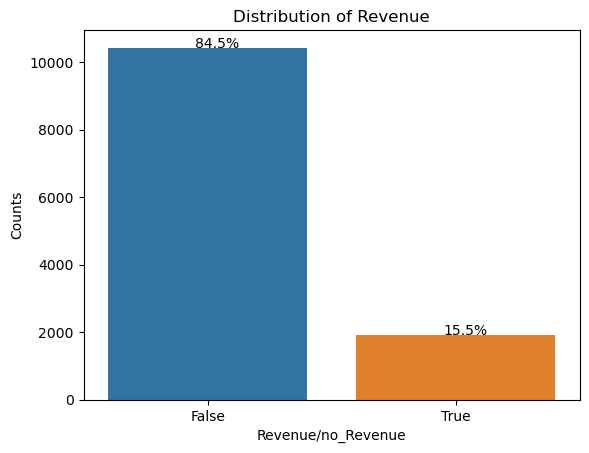

In [39]:
# Distribution of Revenue with features

# create the countplot
plt.title('Distribution of Revenue')
ax=sns.countplot(data=data, x='Revenue')
plt.xlabel('Revenue/no_Revenue')
plt.ylabel('Counts')

# add percentages to the bars
total = float(len(data['Revenue']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

#### Observation: There is an imbalance distribution. A more significant proportion of 84.5% visitors did not purchase compared to those who completed a purchase.

In [40]:
# count of Operating System features

data['OperatingSystems'].value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

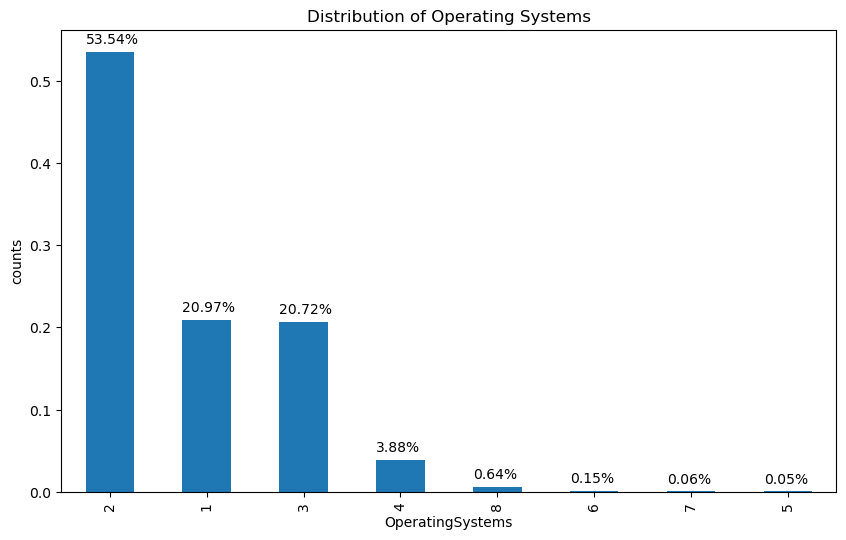

In [41]:
# Distribution of Operating System with features

plt.figure(figsize=(10,6))
ax = data['OperatingSystems'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Operating Systems')
plt.xlabel('OperatingSystems')
plt.ylabel('counts')
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str(round(i.get_height()*100, 2))+'%', fontsize=10, color='black')

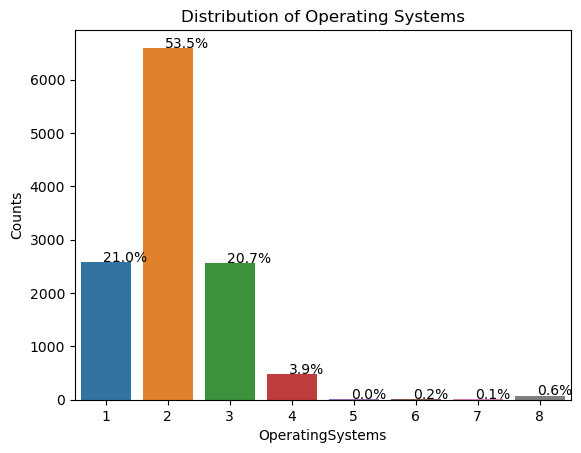

In [42]:
# Distribution of Operating Systems with features

# create the countplot
plt.title('Distribution of Operating Systems')
ax = sns.countplot(data=data, x='OperatingSystems')
plt.xlabel('OperatingSystems')
plt.ylabel('Counts')

# add percentages to the bars
total = float(len(data['OperatingSystems']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

#### Observation:  About 53.5% of the Visitors' mostly use Operating System 2,  followed by 1 (21.0%), and 3 (20.7%), in that order, respectively. Some customers may prefer to use an operating system they are familiar with and have used. For example, if someone has primarily used Windows computers throughout their life, they may be more comfortable using a Windows operating system when shopping online.

In [43]:
# count of Browser features

data['Browser'].value_counts()

2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64

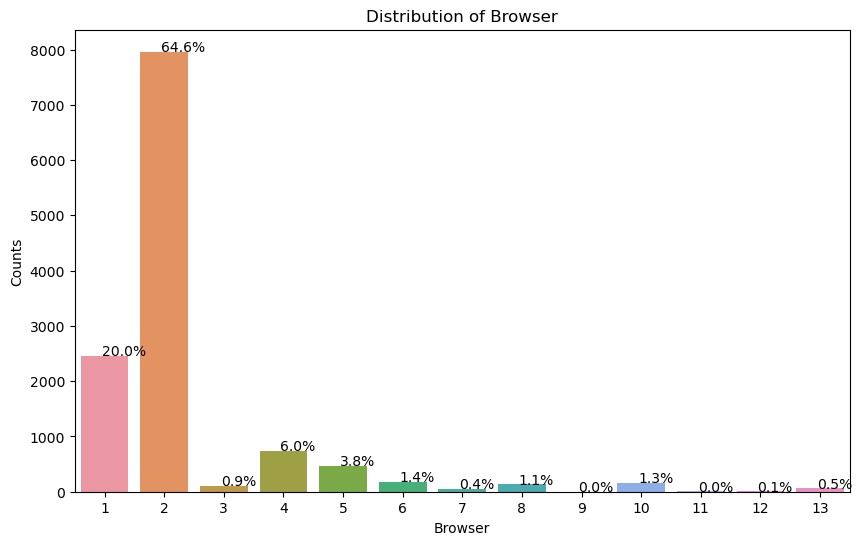

In [44]:
# Distribution of Browser with features

# create the countplot
plt.figure(figsize=(10,6))
plt.title('Distribution of Browser')
ax=sns.countplot(data=data, x='Browser')
plt.xlabel('Browser')
plt.ylabel('Counts')

# add percentages to the bars
total = float(len(data['Browser']))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 5
    ax.annotate(percentage, (x, y))

plt.show()

#### Observation: Visitors' most commonly used browsers are browser 2 (64.6%) and 1 (20.0%), maybe because the website works better on these browsers in terms of faster loading times and few crashes.


# BIVARIATE ANALYSIS

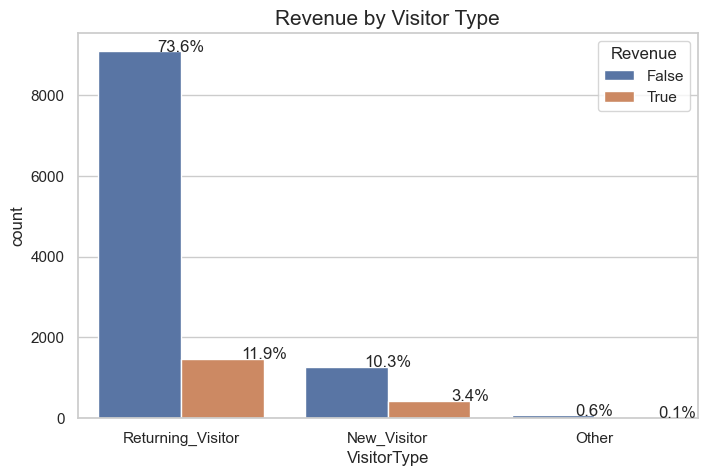

In [45]:
# Revenue by Visitor Type

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x='VisitorType', hue='Revenue', data=data)
plt.title('Revenue by Visitor Type', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.show()

#### Observation: 11.9% of the revenue comes from visitors who have previously visited the website (Returning visitors).

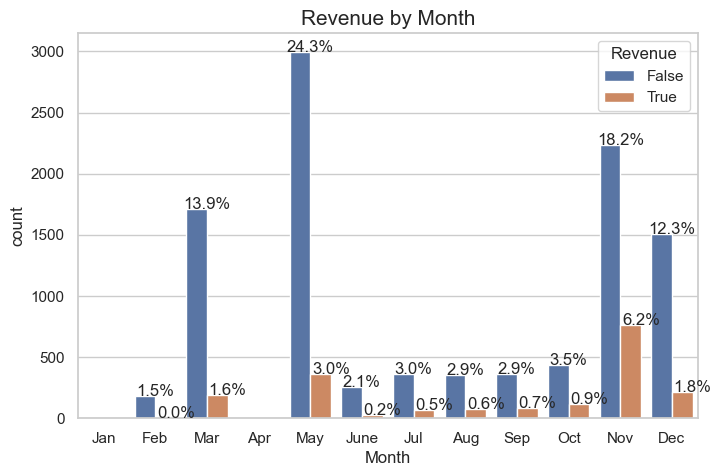

In [46]:
# Revenue by Month

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
orderlist = ['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
total = float(len(data))
ax = sns.countplot(x='Month', hue='Revenue', order=orderlist, data=data)
plt.title('Revenue by Month', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.show()

#### Observation: - The month of January and May has no records.

##### - A significant number of purchases or Revenue was generated in November, with 6.2%, and in May, with 3.0%.

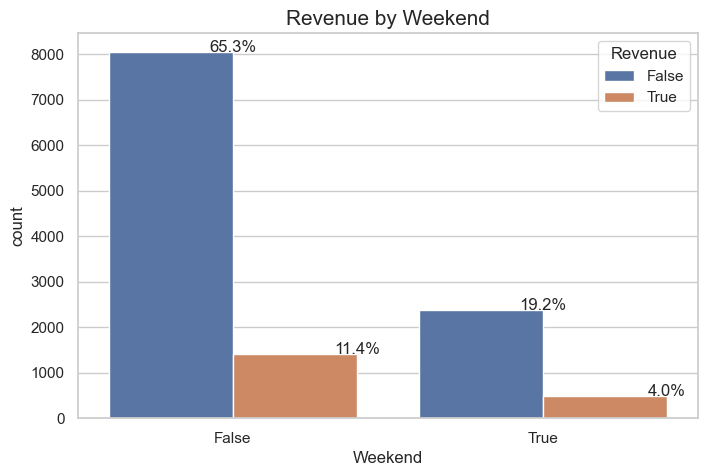

In [47]:
# Revenue by Weekend

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x='Weekend', hue='Revenue', data=data)
plt.title('Revenue by Weekend', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.show()

#### Observation: A significant number of purchases or Revenue was generated on weekdays, with 11.4%, compared to weekends, with 4.0%.

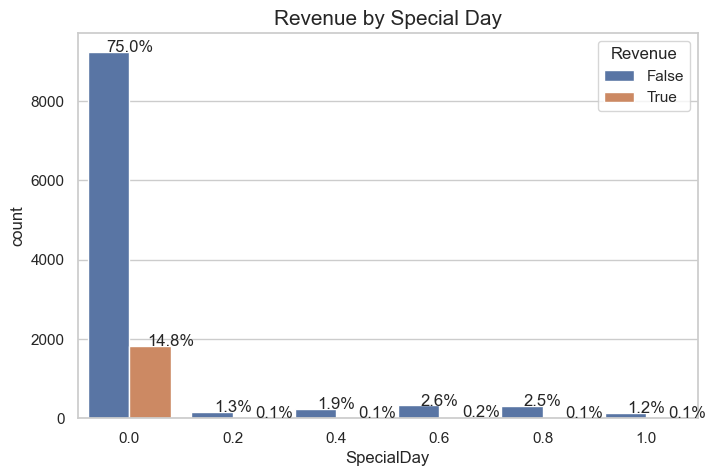

In [48]:
# Revenue by Special Day

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x='SpecialDay', hue='Revenue', data=data)
plt.title('Revenue by Special Day', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.show()

#### Observation: Revenue of 14.8% was generated on Speciaday 0.0.

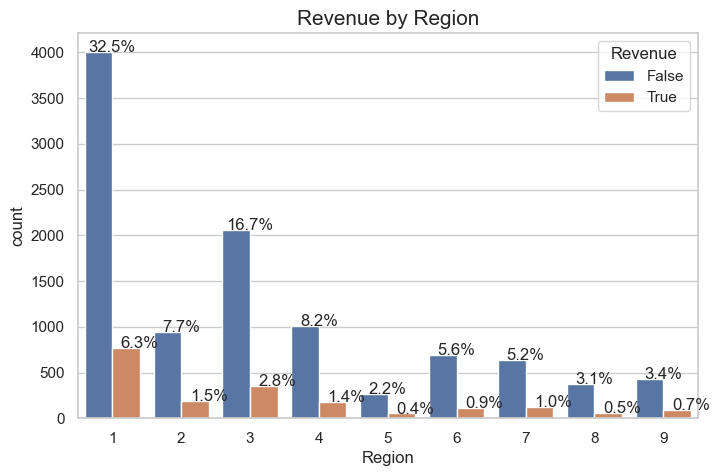

In [49]:
# Revenue by Region

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(data))
ax = sns.countplot(x='Region', hue='Revenue', data=data)
plt.title('Revenue by Region', fontsize=15)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
    
plt.show()

#### Observation: More Revenue of  6.3% was generated in Region 1, followed by Region 3 with 2.8%.

# Multivariate Analysis

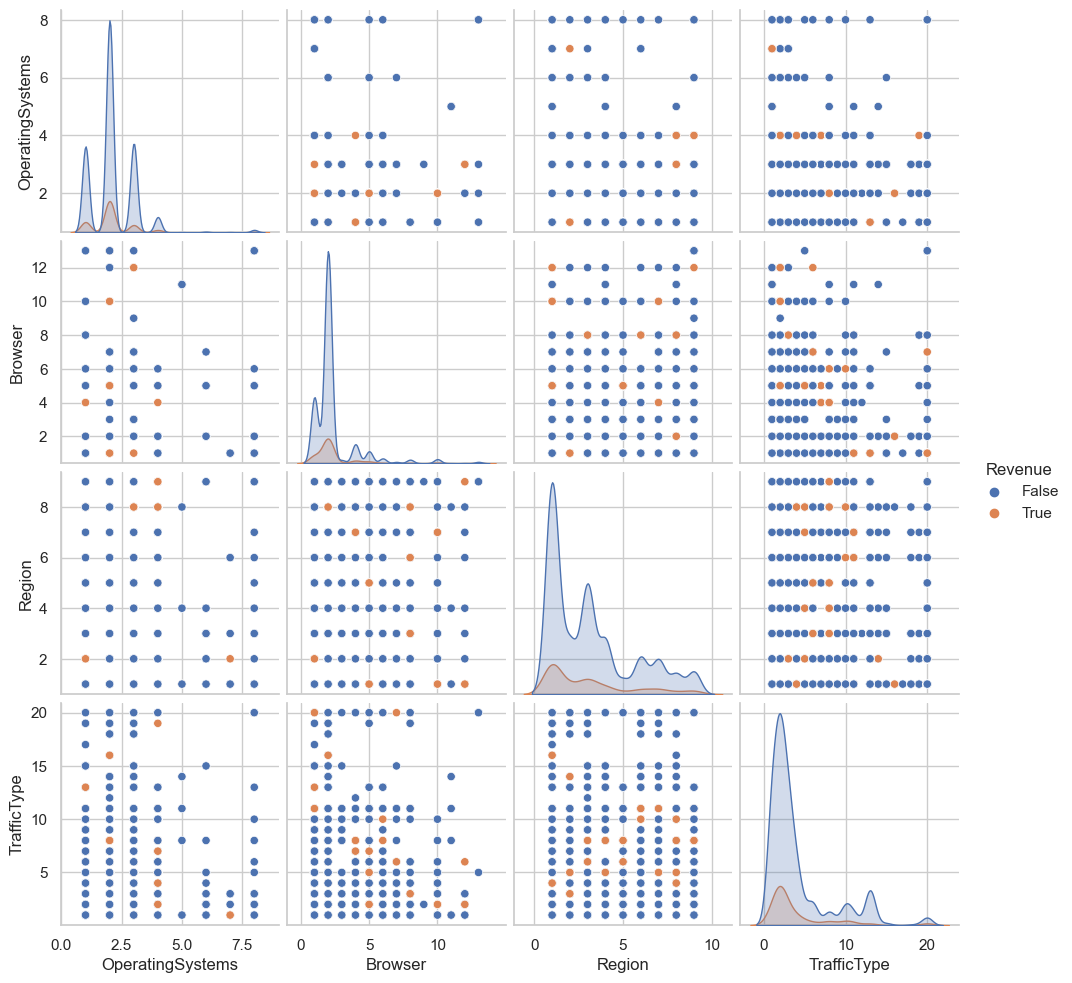

In [51]:
sns.pairplot(data.loc[:,['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Revenue']],hue='Revenue')

In [52]:
corel = data.corr()
corel

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


<AxesSubplot:>

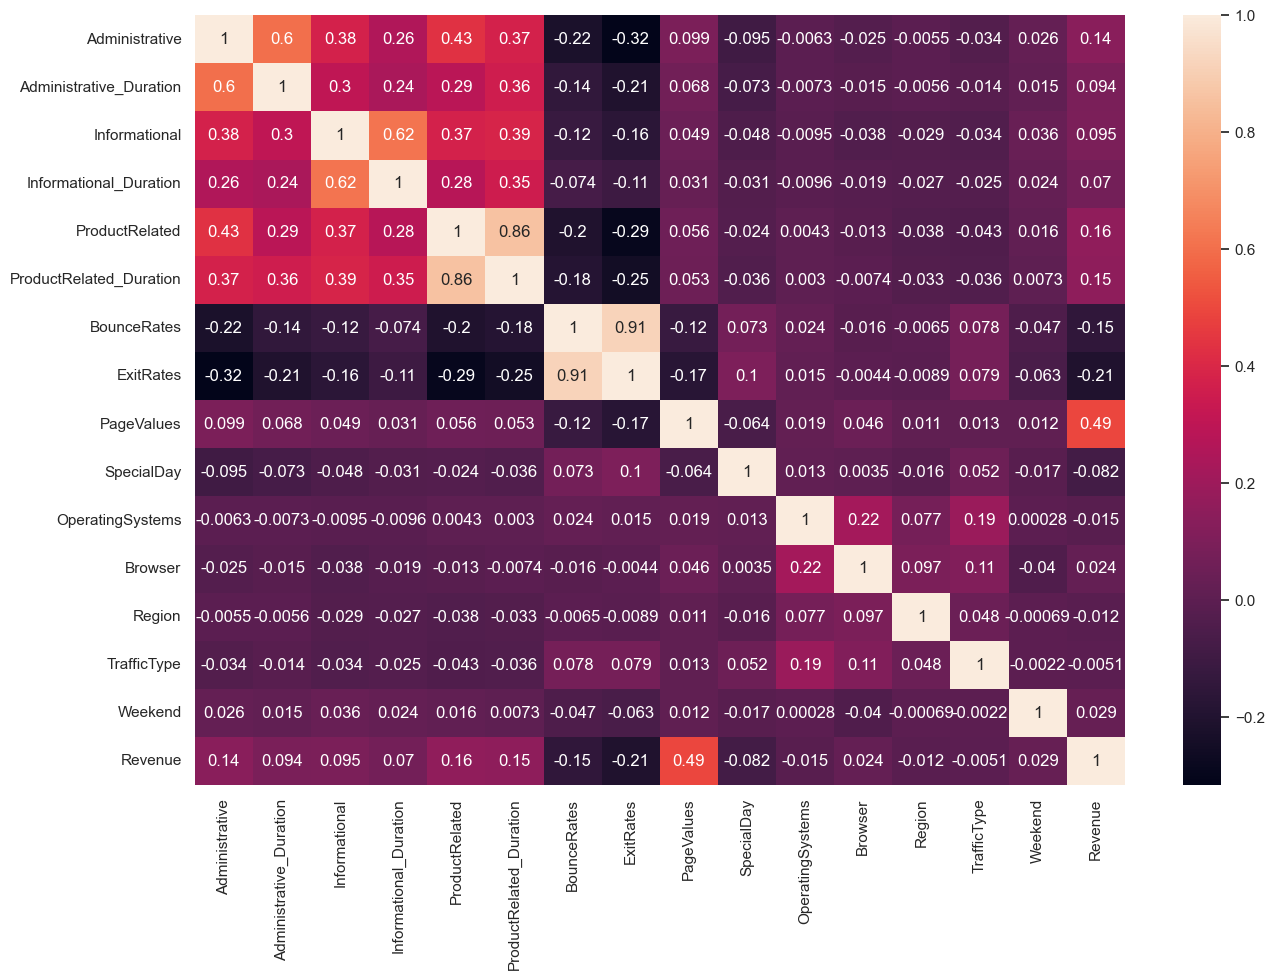

In [53]:
plt.figure(figsize=(15,10))
corel = data.corr()
sns.heatmap(corel, annot=True)

### The Heatmap shows correlation among the different features

#### There is a strong correlation between:

 #### - BounceRates & ExitRates (0.91). 
  #### - ProductRelated & ProductRelated_Duration (0.86).

#### There is a Moderate Correlations between:

 #### - Administrative & Administrative DUration (0.6)
 #### - Informational and Informational Duration (0.62)
 #### - Page Values and Revenue (0.49)

# Data Pre-processing

## Model training process

1.	Encode Categorical features using dummy encoding.
2.	Encode Boolean variables using a label encoder.
3.	Split Data into train and test set.


# Dummy variables

#### - Dummy variables are useful because they allow us to include categorical variables in our analysis, which would otherwise be difficult to include due to their non-numeric nature. They can also help us improve the validity of our results.
#### - A dummy variable is a variable created to assign numerical value to levels of categorical variables . 
#### - Each dummy variable represents one category of the explanatory variable and is coded with 1 if the case falls in that category.

In [54]:
# Encode categorical features (Month, Visitor Type) using dummy encoding

categorical = ['Month', 'VisitorType']

encoded_features = pd.get_dummies(data[categorical])
encoded_features.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,0,1


In [55]:
# Concactenante encoded features to dataset and drop non-encoded variables

data = pd.concat([data, encoded_features], axis=1)

data.drop(categorical, axis=1, inplace=True)

In [56]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


# Label Encoder

In [57]:
# Encode Boolean variables using label Encoder

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Weekend'] = le.fit_transform(data['Weekend'])

In [58]:
print(data.Revenue.value_counts())
print(data.Weekend.value_counts())

0    10422
1     1908
Name: Revenue, dtype: int64
0    9462
1    2868
Name: Weekend, dtype: int64


In [59]:
# seperate target from the dataset (y= target, x= data)

target = data['Revenue']
data = data.drop(columns=['Revenue'], axis=1)

In [60]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


# Data Training and Evaluation

#### - Split our dataset into training and evaluation set
#### - The train test split is going to split our data and target label into 2 (training and testing)
#### - Our data is going to be 70% in X_train and 30% in x_test
#### - Our target label its going to be 70% in y_train and 30% in y_test

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.3,random_state=0)

print(X_train.shape)
print(x_test.shape)

(8631, 28)
(3699, 28)


# MODEL BUILDING

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [64]:
# Instatiate models

DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
NB = GaussianNB()

In [65]:
def c_matrix_plot(y_test,prediction):

    c_matrix = confusion_matrix(y_test,prediction)
    group_names = ['True Positive', 'False Negative', 'False Positive', 'True Negative']
    group_counts = ["{0:0.0f}".format(value) for value in
                    c_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         c_matrix.flatten()/np.sum(c_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    
    ax = sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

   # ax.set_title(f'Confusion Matix for {prediction.__class__.__name__}');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ax.xaxis.set_ticklabels(['not purchase', 'Purchased'])
    ax.yaxis.set_ticklabels(['not purchase', 'Purchased'])

    plt.show()


For Decision Tree Classifier, Accuracy score is  0.8605028386050284
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3077
           1       0.59      0.54      0.57       622

    accuracy                           0.86      3699
   macro avg       0.75      0.73      0.74      3699
weighted avg       0.86      0.86      0.86      3699

[[2845  232]
 [ 284  338]]

	Confusion Matrix for Decision Tree


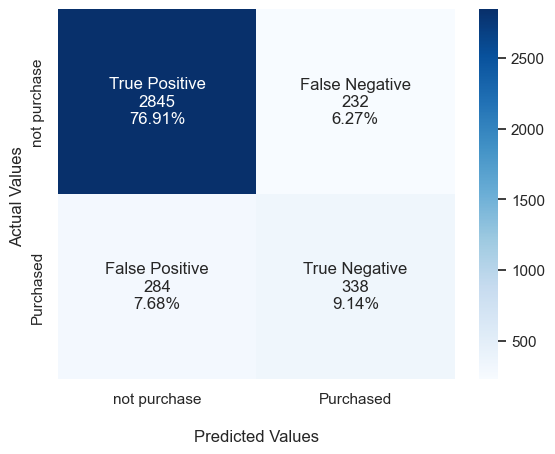


For Random Forest Classifier, Accuracy score is  0.8915923222492566
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      3077
           1       0.75      0.54      0.63       622

    accuracy                           0.89      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.88      0.89      0.88      3699

[[2962  115]
 [ 286  336]]

	Confusion Matrix for Random Forest Classifier


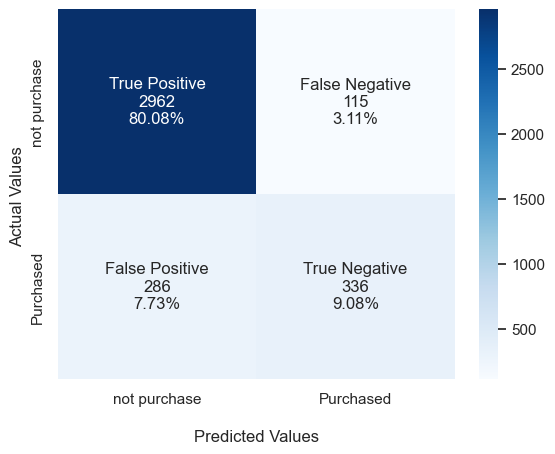


For Gaussian Naive Bayes, Accuracy score is  0.7902135712354691
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      3077
           1       0.42      0.62      0.50       622

    accuracy                           0.79      3699
   macro avg       0.67      0.72      0.68      3699
weighted avg       0.83      0.79      0.81      3699

[[2540  537]
 [ 239  383]]

	Confusion Matrix for Decision Tree


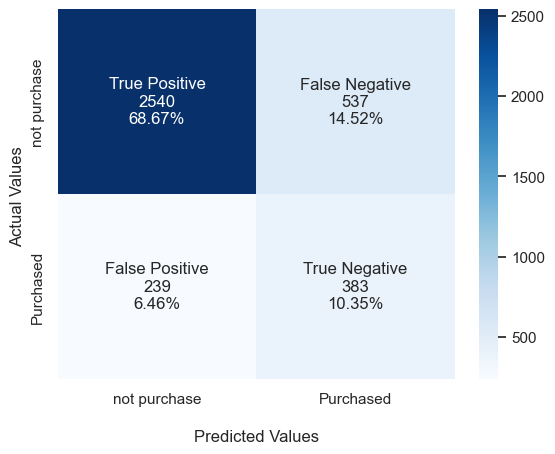

In [66]:
DT = DecisionTreeClassifier()
DT = DT.fit(X_train, y_train) 
DT_preds = DT.predict(x_test) 
print('\nFor Decision Tree Classifier, Accuracy score is ', accuracy_score(y_test,DT_preds))
print(classification_report(y_test,DT_preds))
print(confusion_matrix(y_test,DT_preds))
print('\n\tConfusion Matrix for Decision Tree')
c_matrix_plot(y_test,DT_preds)

RF = RandomForestClassifier()
RF = RF.fit(X_train, y_train) 
RF_preds = RF.predict(x_test) 
print('\nFor Random Forest Classifier, Accuracy score is ', accuracy_score(y_test,RF_preds))
print(classification_report(y_test, RF_preds))
print(confusion_matrix(y_test, RF_preds))
print('\n\tConfusion Matrix for Random Forest Classifier')
c_matrix_plot(y_test, RF_preds)

NB = GaussianNB()
NB = NB.fit(X_train, y_train) 
NB_preds = NB.predict(x_test) 
print('\nFor Gaussian Naive Bayes, Accuracy score is ', accuracy_score(y_test,NB_preds))
print(classification_report(y_test,NB_preds))
print(confusion_matrix(y_test, NB_preds))
print('\n\tConfusion Matrix for Decision Tree')
c_matrix_plot(y_test, NB_preds)

# Plotting ROC Curve

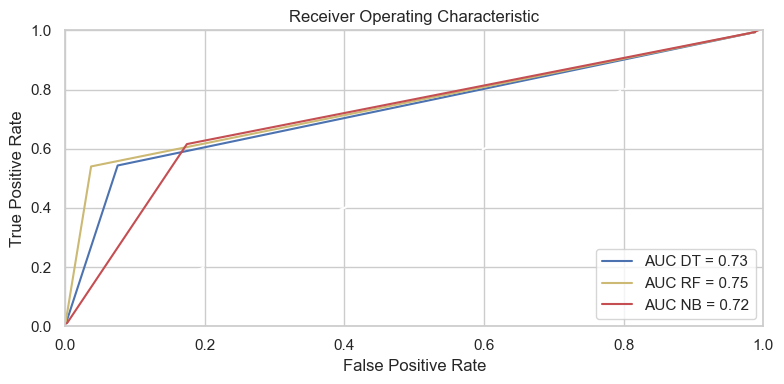

In [67]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, threshold_dt = metrics.roc_curve(y_test, DT_preds)
roc_auc_dt = metrics.auc(fpr_dt, tpr_dt)
fpr_rf, tpr_rf, threshold_rf = metrics.roc_curve(y_test, RF_preds)
roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
fpr_nb, tpr_nb, threshold_nb = metrics.roc_curve(y_test, NB_preds)
roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)


fig = plt.figure(figsize=(8, 4))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_dt, tpr_dt, 'b', label = 'AUC DT = %0.2f' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, 'y', label = 'AUC RF = %0.2f' % roc_auc_rf)
plt.plot(fpr_nb, tpr_nb, 'r', label = 'AUC NB = %0.2f' % roc_auc_nb)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'w--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tight_layout()
plt.show()

# Hyper-Parameter Tuning - Random Forest

In [68]:
from pprint import pprint

print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [69]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [70]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [72]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=50, max_features='sqrt',
                       min_samples_leaf=2, n_estimators=800)


For Random Forest Classifier, Accuracy score is  0.8934847256015139
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3077
           1       0.77      0.53      0.62       622

    accuracy                           0.89      3699
   macro avg       0.84      0.75      0.78      3699
weighted avg       0.89      0.89      0.89      3699

[[2977  100]
 [ 294  328]]

	Confusion Matrix for Random Forest


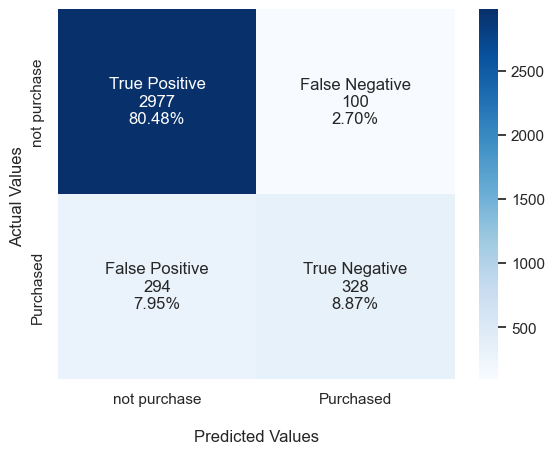

In [73]:
rf_random = RandomForestClassifier(n_estimators=1600,
                                   max_depth=10,
                                   min_samples_split=2,
                                   min_samples_leaf=4,
                                   max_features='sqrt',
                                   bootstrap=True) 
rf_random.fit(X_train,y_train)
rf_random_preds = rf_random.predict(x_test)

print('\nFor Random Forest Classifier, Accuracy score is ', accuracy_score(y_test, rf_random_preds))
print(classification_report(y_test, rf_random_preds))
print(confusion_matrix(y_test, rf_random_preds))
print('\n\tConfusion Matrix for Random Forest')
c_matrix_plot(y_test, rf_random_preds)

Observation: Random Forest Classifier has the best classification performance with an accuracy of 81% and F1 score of 62%.

# Inspect Feature Importance

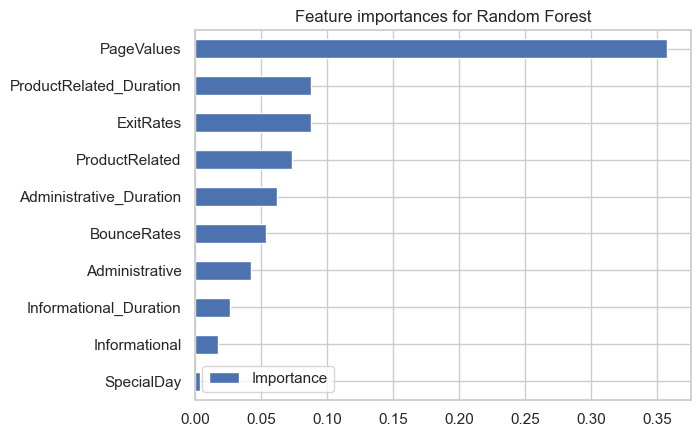

In [74]:
# create a random forest model
rf = RandomForestClassifier()

# fit the model to the training data
rf.fit(X_train, y_train)

# get feature importances
RF_importances = pd.DataFrame(data = rf.feature_importances_,index = x_test.columns, columns=['Importance'])

# plot top 10 feature importances, sorted
RF_importances[:10].sort_values(by='Importance').plot.barh()

plt.title('Feature importances for Random Forest')
plt.show()

#### Observation: The most significant feature in our dataset is PageValues since it correlates most strongly with our target variable (Revenue). This feature importance graph generally aligns with our correlation analysis.